# 機械学習 第３回レポート課題

## 0.概要
- 配布する訓練データ（X_train.npy、y_train.npy）を用いて2クラス分類問題を学習させ、配布するテストデータ（X_test.npy）に対するyのバイナリの予測値を一次元配列の形でcsvファイルとして提出せよ。授業で学んだようなモデルたちの比較や、ハイパーパラメーターを色々サーチしたりすることでベストなマイモデルを作成し、それによる予測値を提出。ファイル名は22vr0000_JeffHinton_Jeff.csvのように、学籍番号_名前_名前2.csvとすること。「名前2」の部分はスコアと共に公開されるので、どうしても本名が嫌な場合はあだ名を自分でつけること（まぁ、結果が悪くても恥ずかしがらなくていいので、本名で構いませんよ！）。利用可能な機械学習モデルは、授業で扱ったものに限るものとする。

- 訓練用のx、y（X_train.npy、y_train.npy）と、テスト用のxデータ（X_test.npy）は、以下のフォルダにある
    - https://drive.google.com/drive/folders/1DBoFa7Re_MRRrAjdvlOKDlwpYdfHQIyR?usp=share_link

### 注意事項
1. 再現性の確認のため、作業の記録・分析をColab Notebookの形にまとめてレポートとして提出すること。
2. 手抜き・工夫のない故に性能が低い結果は評価が低いが、いろいろがんばった結果スコアが悪い場合はきちんと評価する。また簡単に多量のモデルを比較できる便利ツールを使った結果は評価しません（便利で良いツールでも、それを使っても学びはないのと思うので、この授業では評価しません）

## 1.モデル構築

In [119]:
#必要ライブラリのインポート

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn
import matplotlib.pyplot as plt
import japanize_matplotlib

In [120]:
#訓練用データセットの読み込み。
X_train_data = np.load('./report_3_dataset/X_train.npy')
y_train_data = np.load('./report_3_dataset/y_train.npy')

#DataFrameに変換
df_X = pd.DataFrame(X_train_data)
df_y = pd.DataFrame(y_train_data)

In [151]:
#一応欠損値の有無を確認する
print(df_X.isnull().sum().sum())
print(df_y.isnull().sum().sum())

0
0


In [121]:
df_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,...,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000,501000.000000
mean,-0.296658,-0.000339,-0.000096,-0.353460,-0.000187,-0.167439,-0.620327,-0.001115,0.000116,-0.003484,...,-0.313463,0.001511,-0.000276,0.013857,-0.120519,-0.258847,-0.112201,-0.379788,-0.558423,1000.040912
std,0.800311,1.036417,1.001021,0.830636,0.999340,0.903298,0.609848,1.054332,1.000462,1.000990,...,0.779508,1.011269,0.999578,1.007975,0.841278,0.699219,0.670241,0.612964,0.710609,353.649359
min,-1.960549,-2.365194,-1.732160,-7.957071,-1.732132,-1.054221,-2.639252,-2.757771,-1.732348,-1.325801,...,-1.728273,-2.281851,-1.731758,-0.573682,-3.553998,-4.119920,-12.909924,-2.890791,-2.622245,499.999969
25%,-0.883383,-0.776614,-0.867655,-0.822573,-0.864117,-1.054221,-1.051701,-0.754030,-0.867531,-1.325801,...,-0.902770,-0.735839,-0.866116,-0.573682,-0.550642,-0.575910,-0.352207,-0.768097,-1.084409,750.000000
50%,-0.313111,0.000098,-0.000777,-0.282744,0.001136,-0.005984,-0.669953,-0.002491,0.000724,0.754261,...,-0.362352,0.002914,-0.001527,-0.573682,-0.228603,-0.372959,-0.330174,-0.529713,-0.659657,1000.000000
75%,0.260358,0.773945,0.867475,0.200908,0.865307,-0.005984,-0.247089,0.749907,0.867678,0.754261,...,0.203735,0.739490,0.864589,1.743123,0.296859,-0.175329,-0.273218,-0.097020,-0.134894,1250.000000
max,3.250548,2.365192,1.732370,3.499624,1.731978,4.482618,2.684753,2.758158,1.731450,0.754261,...,4.067270,2.282209,1.732740,1.743123,6.111819,7.371399,10.964278,4.101110,3.554938,1500.000000


In [122]:
#訓練データの割合を見てみる。
df_y[0].value_counts()

0
0    500000
1      1000
Name: count, dtype: int64

↑の結果より訓練データがかなり不均衡である.

よってデータセット分割には、層化サンプリングを用いることにする。

In [123]:
#グラフ表示用の補助関数
def plot_data_sampling(y_train, y_val, col_name: str=None) -> None:

    if col_name == None:
        df_counts = pd.DataFrame({'Train': y_train[0].value_counts(), 'Validation': y_val[0].value_counts()})
    else:
        df_counts = pd.DataFrame({'Train': y_train[col_name].value_counts(), 'Validation': y_val[col_name].value_counts()})
    # 棒グラフで表示
    df_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('訓練データと検証データのラベルの分布')
    plt.ylabel('Count')
    plt.xlabel('Label')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

各データセットのサイズ
X_train: (350700, 28), y_train: (350700, 1)
X_val: (150300, 28), y_val: (150300, 1)
訓練データのラベル分布
 0
0    350000
1       700
Name: count, dtype: int64
検証データのラベル分布
 0
0    150000
1       300
Name: count, dtype: int64


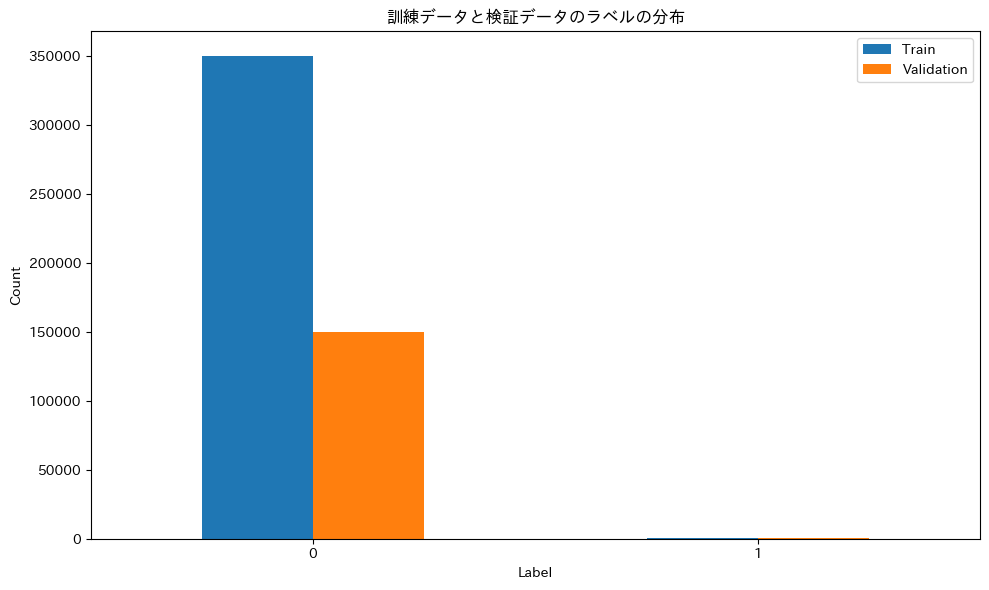

In [124]:
#訓練用データと検証用データの分割
X_train, X_val, y_train, y_val = train_test_split(
    df_X, 
    df_y, 
    test_size=0.3,
    stratify = df_y, #データの正解ラベル分布を元に層化サンプリングを行う
    random_state=1234)

print("各データセットのサイズ")
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')

#ラベルのデータの分布を確認
print(f'訓練データのラベル分布\n {y_train[0].value_counts()}')
print(f'検証データのラベル分布\n {y_val[0].value_counts()}')

plot_data_sampling(y_train, y_val)



↑の結果より、まだ不均衡が大きい.

よってtrainデータの内、ラベル0の学習データをラベル1の学習データの数だけランダムに抽出し、強制的に均衡のとれた新たな学習データを作成する。

各データセットのサイズ
X_train: (1400, 28), y_train: (1400, 1)
X_val: (600, 28), y_val: (600, 1)


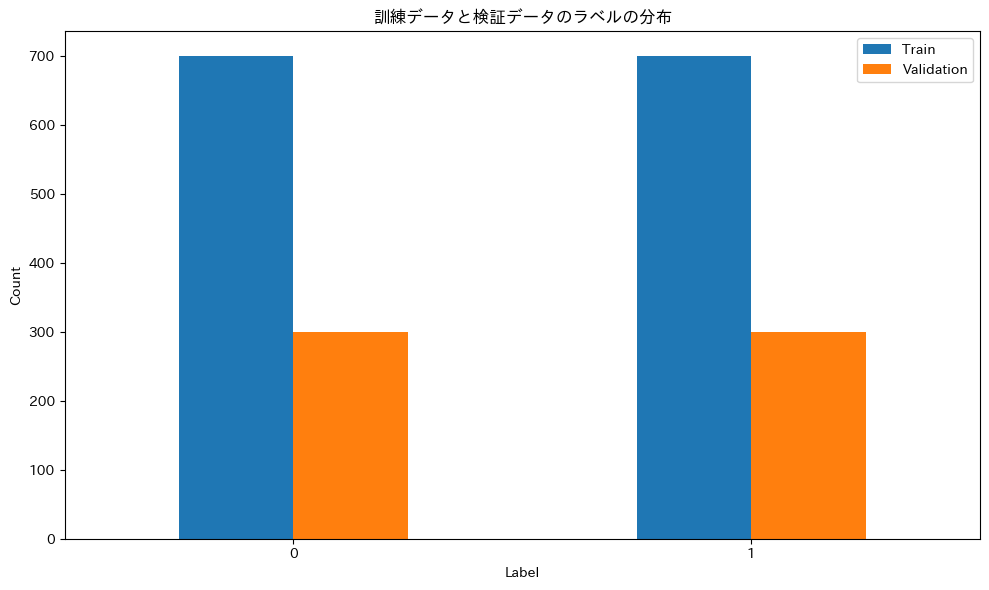

In [125]:
#面倒なので一時的に、特徴量とラベルデータを結合する
df = df_X.copy()
df['label'] = df_y

#label=1のデータ数と同じ分だけ、label=0のデータをランダムに抽出する
sampling_size = df[df['label']==1].shape[0]
sampled_df_0 = df[df['label']==0].sample(n=sampling_size, random_state=123)

#結合して新たに訓練用DataFrameを作成
train_df = pd.concat([df[df['label']==1], sampled_df_0], axis=0)

#データセットの分割
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop('label', axis=1), 
    train_df[['label']], 
    test_size=0.3, 
    random_state=123)

print("各データセットのサイズ")
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')

plot_data_sampling(y_train, y_val, 'label')


### ロジスティック回帰モデルの検証

In [126]:
#まずはロジスティック回帰

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#標準化->ロジスティック回帰
process = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear', random_state=123))
])

hyper_param = {
    "logistic__C" : [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', "l2"]
}

score_method = 'f1'
gs = GridSearchCV(process, hyper_param, cv=3, scoring='f1')
gs.fit(X_train, y_train)

print(f'ベストなパラメータ設定：{gs.best_params_}')
print(f'ベストな{score_method} : {gs.best_score_}')

c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was 

ベストなパラメータ設定：{'logistic__C': 0.1, 'logistic__penalty': 'l1'}
ベストなf1 : 0.837621011721292


c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was 

In [127]:
#上の条件下でベストなモデルを抽出
model = gs.best_estimator_
y_pred = model.predict(X_val)

# モデルの評価
[[tn, fp], [fn, tp]] = confusion_matrix(y_val, y_pred)
print(f'混同行列 : \n[{[tn, fp]}\n{[fn, tp]}]')

print(f'正解率 : {accuracy_score(y_val, y_pred)}')
print(f'適合率 : {precision_score(y_val, y_pred)}')
print(f'再現率 : {recall_score(y_val, y_pred)}')
print(f'F1値 : {f1_score(y_val, y_pred)}')



混同行列 : 
[[255, 45]
[41, 259]]
正解率 : 0.8566666666666667
適合率 : 0.8519736842105263
再現率 : 0.8633333333333333
F1値 : 0.8576158940397351


学習データの分布がそのままの場合はどうなるか検証してみる。

In [128]:
#学習データの分布をカスタムしないでそのまま学習させた場合を確認する。
#訓練用データと検証用データの分割
X_train_ori, X_val_ori, y_train_ori, y_val_ori = train_test_split(
    df_X, 
    df_y, 
    test_size=0.3,
    stratify = df_y, #データの正解ラベル分布を元に層化サンプリングを行う
    random_state=1234)

print("各データセットのサイズ")
print(f'X_train: {X_train_ori.shape}, y_train: {y_train_ori.shape}')
print(f'X_val: {X_val_ori.shape}, y_val: {y_val_ori.shape}')

#ラベルのデータの分布を確認
print(f'訓練データのラベル分布\n {y_train_ori[0].value_counts()}')
print(f'検証データのラベル分布\n {y_val_ori[0].value_counts()}')

#標準化->ロジスティック回帰
process = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear', random_state=123))
])

hyper_param = {
    "logistic__C" : [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', "l2"]
}

score_method = 'f1'
gs = GridSearchCV(process, hyper_param, cv=3, scoring=score_method)
gs.fit(X_train_ori, y_train_ori)

print(f'ベストなパラメータ設定：{gs.best_params_}')
print(f'ベストな{score_method} : {gs.best_score_}')

#上の条件下でベストなモデルを抽出
model = gs.best_estimator_
y_pred = model.predict(X_val_ori)

# モデルの評価
[[tn, fp], [fn, tp]] = confusion_matrix(y_val_ori, y_pred)
print(f'混同行列 : \n[{[tn, fp]}\n{[fn, tp]}]')

print(f'正解率 : {accuracy_score(y_val_ori, y_pred)}')
print(f'適合率 : {precision_score(y_val_ori, y_pred)}')
print(f'再現率 : {recall_score(y_val_ori, y_pred)}')
print(f'F1値 : {f1_score(y_val_ori, y_pred)}')



各データセットのサイズ
X_train: (350700, 28), y_train: (350700, 1)
X_val: (150300, 28), y_val: (150300, 1)
訓練データのラベル分布
 0
0    350000
1       700
Name: count, dtype: int64
検証データのラベル分布
 0
0    150000
1       300
Name: count, dtype: int64


c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\syu\Learning\Class_ML-Reports\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was 

ベストなパラメータ設定：{'logistic__C': 1, 'logistic__penalty': 'l1'}
ベストなf1 : 0.014017421314517371
混同行列 : 
[[150000, 0]
[294, 6]]
正解率 : 0.9980439121756487
適合率 : 1.0
再現率 : 0.02
F1値 : 0.0392156862745098


以上のロジスティック回帰モデル結果を改めてまとめる。

なお、混同行列の見方は以下の通りである。
```bash
[[TN, FP], 
[FN, TP]]
```

- 学習データのクラス分布をカスタムせずに、そのまま学習させた場合の結果。
```bash
ベストなパラメータ設定：{'logistic__C': 1, 'logistic__penalty': 'l1'}
ベストなf1 : 0.014017421314517371
混同行列 : 
[[150000, 0]
[294, 6]]
正解率 : 0.9980439121756487
適合率 : 1.0
再現率 : 0.02
F1値 : 0.0392156862745098
```

* オリジナルの学習データでは、ラベル0のデータがラベル1のデータに対して圧倒的に多く、クラス分布が非常に不均衡であった。そのまま学習させた場合、モデルは大半のデータをラベル0と予測し、ラベル1と予測することがほとんどない。
    * このことは、再現率が極端に低く、F1値も低い値となっていることからもわかる。
* 一方、適合率が1.0であるので、モデルがラベル1と予測したデータに関しては、全て正解していることがわかる。しかし、再現率が0.02と極端に低いことから、正解がラベル1のはずのデータの大半を、ラベル0と誤った予測していることがわかる。


- 学習データをカスタムして、データ内のクラス分布を均等にした場合。
```bash
ベストなパラメータ設定：{'logistic__C': 0.1, 'logistic__penalty': 'l1'}
ベストなf1 : 0.837621011721292
混同行列 : 
[[255, 45]
[41, 259]]
正解率 : 0.8566666666666667
適合率 : 0.8519736842105263
再現率 : 0.8633333333333333
F1値 : 0.8576158940397351
```

* 各指標ともに85%以上の値を記録していることから、バランスのとれたモデルと言えるだろう。
* 学習データを調整し、クラス分布を均等にしたことで、モデルはラベル0とラベル1のデータを、それぞれ適切に予測できるようになったと言える。
* 混同行列の値からも、モデルの予測に関して大きなバイアスがないことがうかがえる。

以上より、学習データに存在するクラスの分布が不均衡な場合、モデルの性能に大きく影響することが実際に確かめられ、学習データの調整が生成されるモデルを改善させたことが明らかになった。




### XGBoostモデルでの検証

ロジスティック回帰モデルよりも性能を上げるため、XGBoostを用いて分類モデルの作成を行う。

上の分析結果より、学習データのクラス分布を均衡になるよう調整したうえで、モデルの作成を行う。

In [135]:
import xgboost as xgb

各データセットのサイズ
X_train: (1400, 28), y_train: (1400, 1)
X_val: (600, 28), y_val: (600, 1)


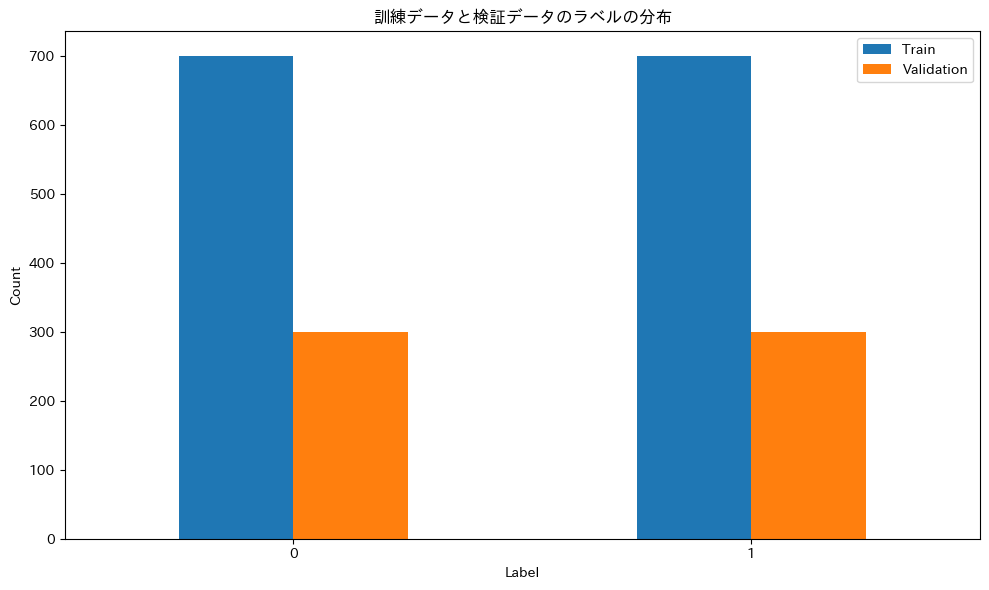

In [137]:

#念のためデータを読み直す。
#訓練用データセットの読み込み。
X_train_data = np.load('./report_3_dataset/X_train.npy')
y_train_data = np.load('./report_3_dataset/y_train.npy')

#DataFrameに変換
df_X = pd.DataFrame(X_train_data)
df_y = pd.DataFrame(y_train_data)

df = df_X.copy()
df['label'] = df_y
#label=1のデータ数と同じ分だけ、label=0のデータをランダムに抽出する
sampling_size = df[df['label']==1].shape[0]
sampled_df_0 = df[df['label']==0].sample(n=sampling_size, random_state=123)
#結合して新たに訓練用DataFrameを作成
train_df = pd.concat([df[df['label']==1], sampled_df_0], axis=0)
#データセットの分割
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop('label', axis=1), 
    train_df[['label']], 
    test_size=0.3, 
    random_state=123)
print("各データセットのサイズ")
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')
plot_data_sampling(y_train, y_val, 'label')

In [149]:

hyper_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4], #学習率を細かく刻んでみる
    'max_depth': [2, 3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

gs = GridSearchCV(xgb.XGBClassifier(), hyper_params, cv=5, verbose=2, n_jobs=-1, scoring=score_method) 
gs.fit(X_train, y_train)

print(f'ベストなパラメータ設定：{gs.best_params_}')
print(f'ベストな{score_method} : {gs.best_score_}')


Fitting 5 folds for each of 1134 candidates, totalling 5670 fits
ベストなパラメータ設定：{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
ベストなf1 : 0.8468128685954135


In [150]:
#モデルの検証
xgb_model = gs.best_estimator_
y_pred = xgb_model.predict(X_val)

# モデルの評価
[[tn, fp], [fn, tp]] = confusion_matrix(y_val, y_pred)
print(f'混同行列 : \n[{[tn, fp]}\n{[fn, tp]}]')

print(f'正解率 : {accuracy_score(y_val, y_pred)}')
print(f'適合率 : {precision_score(y_val, y_pred)}')
print(f'再現率 : {recall_score(y_val, y_pred)}')
print(f'F1値 : {f1_score(y_val, y_pred)}')


混同行列 : 
[[247, 53]
[35, 265]]
正解率 : 0.8533333333333334
適合率 : 0.8333333333333334
再現率 : 0.8833333333333333
F1値 : 0.8576051779935275


ロジスティック回帰の時と性能があまり変わらなかった。。。

特徴重要度を見てみる。

In [156]:
xgb_model.feature_importances_

array([0.02884307, 0.02251759, 0.02009848, 0.03422513, 0.02050035,
       0.01546778, 0.23197012, 0.02055872, 0.02030784, 0.02358374,
       0.04557671, 0.02088367, 0.02246537, 0.02098375, 0.04135083,
       0.02441435, 0.01997135, 0.01793842, 0.02661687, 0.01896103,
       0.01981463, 0.01810664, 0.01888704, 0.02003992, 0.0219165 ,
       0.02205676, 0.08113228, 0.10081117], dtype=float32)

## 提出用CSVの作成

In [146]:
def create_pred_csv(model, save_path: str, X_test) -> None:
    y_test_pred = model.predict(X_test)
    
    #1次元配列に変換しcsvファイルに保存
    y_test_pred = y_test_pred.flatten()
    y_test_pred = pd.Series(y_test_pred)
    y_test_pred.to_csv(save_path, header=False, index=False)

In [147]:
#XGBoostのモデルで予測結果を作成する。

X_test_data = np.load('./report_3_dataset/X_test.npy')
X_test = pd.DataFrame(X_test_data)

X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.017058,0.002947,0.000348,0.009352,0.001336,0.005048,0.018258,0.000224,0.000827,-0.007624,...,0.011623,0.000680,-0.000216,0.000248,0.009791,0.005626,0.006057,-0.003037,0.016110,1000.908744
std,1.003504,0.998051,1.001752,0.996006,1.001379,1.002412,0.985894,0.995988,1.000542,1.002150,...,1.002433,1.001255,0.999155,1.000147,1.006102,1.000714,1.010743,0.985719,0.981912,353.934308
min,-1.960540,-2.365270,-1.732154,-8.337594,-1.732132,-1.054221,-2.723966,-2.756906,-1.732354,-1.325801,...,-1.728263,-2.281828,-1.731691,-0.573682,-3.506154,-4.170301,-12.438910,-2.818775,-2.405534,499.999969
25%,-0.725829,-0.730915,-0.868542,-0.613848,-0.868680,-1.054221,-0.756684,-0.700977,-0.864112,-1.325801,...,-0.741592,-0.717518,-0.860638,-0.573682,-0.540905,-0.513867,-0.354466,-0.693877,-0.790811,750.000000
50%,-0.039701,0.004175,0.002383,0.019786,0.001717,-0.005984,-0.147626,-0.001317,0.000103,0.754261,...,-0.089901,-0.001273,-0.002180,-0.573682,-0.161255,-0.315054,-0.326457,-0.359171,-0.087536,1000.000000
75%,0.690192,0.737245,0.869645,0.681609,0.868735,0.850488,0.766116,0.700187,0.869586,0.754261,...,0.641833,0.722306,0.864060,-0.573682,0.477800,0.159851,-0.232378,0.472087,0.762548,1250.000000
max,3.939296,2.365069,1.732359,3.165104,1.731967,4.482618,3.542095,2.758112,1.731428,0.754261,...,5.684810,2.282110,1.732723,1.743123,7.214255,9.081770,14.557425,4.695815,4.212446,1500.000000


In [148]:
create_pred_csv(xgb_model, "./result/23vr008n-xgb.csv", X_test)